# WeatherPy
----

### Three Observable Trends Note

**Please refer to the README for the three observable trends.**

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# IMPORTANT: DO NOT RUN THIS CELL UNLESS YOU WANT A FRESH DATASET TO RUN THE
# API CALLS IN THE NEXT CELL

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# IMPORTANT: DO --NOT-- RUN THIS CELL AGAIN UNLESS YOU WANT TO CONSTRUCT A NEW
# DATAFRAME. IF YOU DO, PLEASE RE RUN ALL SUBSEQUENT CELLS TO GET ACCURATE PLOTS
# FOR THE QUERIED DATAFRAME. IF YOU ONLY WANT THE DATA I GOT FROM THIS QUERY, 
# PLEASE START THREE CELLS BELOW THIS ONE.

# Base url to modify later for API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Empty DataFrame to append rows of city weather data into
weather_df = pd.DataFrame()

# Counter to keep track of sets processed
set_counter = 1

# Counter to keep track of records processed
record_counter = 1

# Begin data retreval loop
print("Beginning Data Retrieval")
print("------------------------------------------")
for city in cities:
    # Build query URL (imperial units)
    query = f"{base_url}appid={weather_api_key}&units=imperial&q={city}"

    # Get response for queried city
    response = requests.get(query)
    
    # If 404 error response, print "city was not found."
    # Found out the hard way that the skipped query still counts toward the 
    # query calls per minute...
    if response.status_code == 404:
        # If the missing city record number is 50, print it as the 50th record
        if record_counter % 50 == 0:
            print(f"City not found. Skipping Record 50 of Set {set_counter}"
                f" | {city}")
            set_counter += 1
            time.sleep(60)
        # Otherwise, print the record number modulo 50
        else:
           print(f"City not found. Skipping Record {record_counter % 50} of Set"
           f" {set_counter} | {city}")
    else:
        # Get weather information from response as json object
        weather_info = response.json()

        # Append weather information of interest into weather_df
        city_weather_info = {
            "city": weather_info["name"],
            "longitude": weather_info["coord"]["lon"],
            "latitude": weather_info["coord"]["lat"],
            "maxtemp_f": weather_info["main"]["temp_max"],
            "humidity_percent": weather_info["main"]["humidity"],
            "cloudiness_percent": weather_info["clouds"]["all"],
            "windspeed_mph": weather_info["wind"]["speed"],
            "country": weather_info["sys"]["country"],
            "date": weather_info["dt"]
        }
        weather_df = weather_df.append(city_weather_info, ignore_index=True)

        # Display record processing count
        # If record counter is a multiple of 50, print the 50th record of the
        # set, increment the set count, and sleep for 60 seconds to avoid
        # getting yelled at by openweathermap
        if record_counter % 50 == 0:
            print(f"Processing Record 50 of Set {set_counter} | {city}")
            set_counter += 1
            time.sleep(60)
        # Otherwise, print the record counter modulo 50
        else:
            print(f"Processing Record {record_counter % 50} of Set {set_counter}"
                f" | {city}")
    # Increment record counter before proceeding to the next city
    record_counter += 1

Beginning Data Retrieval
------------------------------------------
Processing Record 1 of Set 1 | san isidro
Processing Record 2 of Set 1 | ushuaia
City not found. Skipping Record 3 of Set 1 | nizhneyansk
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | key largo
Processing Record 6 of Set 1 | norman wells
City not found. Skipping Record 7 of Set 1 | cockburn harbour
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | mayumba
Processing Record 12 of Set 1 | soyo
Processing Record 13 of Set 1 | igarka
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | isla mujeres
Processing Record 16 of Set 1 | superior
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | diego de almagro
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | ribeira grande
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# IMPORTANT: DO --NOT-- RUN THIS CELL AGAIN UNLESS YOU HAVE A NEW QUERIED
# DATAFRAME. IF YOU DO, PLEASE RE-RUN ALL SUBSEQUENT CELLS TO GET ACCURATE PLOTS
# FOR THE QUERIED DATAFRAME. IF YOU ONLY WANT THE DATA I GOT FROM THIS QUERY, 
# PLEASE START THE CELL BELOW THIS ONE.

# Convert unix epoch date to local datetime
weather_df["date"] = pd.to_datetime(weather_df["date"], unit="s")
weather_df["date"] = weather_df["date"].dt.tz_localize("utc").dt.tz_convert("US/Eastern")

# Save the dataframe to avoid rerunning the queries
weather_df.to_csv("output/weather_data.csv", index=False)

# Display first five rows
weather_df.head()

,city,longitude,latitude,maxtemp_f,humidity_percent,cloudiness_percent,windspeed_mph,country,date
0,San Isidro,-77.0500,-12.1167,68.50,50.0,0.0,1.01,PE,2022-02-05 22:20:17-05:00
1,Ushuaia,-68.3000,-54.8000,49.66,57.0,20.0,18.41,AR,2022-02-05 22:16:47-05:00
2,Tasiilaq,-37.6368,65.6145,14.16,55.0,95.0,6.93,GL,2022-02-05 22:10:33-05:00
3,Key Largo,-80.4473,25.0865,72.01,80.0,48.0,8.88,US,2022-02-05 22:19:45-05:00
4,Norman Wells,-126.8329,65.2820,-10.93,93.0,40.0,5.86,CA,2022-02-05 22:13:58-05:00


In [5]:
# START HERE TO AVOID RUNNING THE API CALLS

# Read exported csv file (to avoid having to rely on query-built DataFrame)
weather_df = pd.read_csv("output/weather_data.csv")

# Get summary of data to inspect for any weird results
weather_df.describe()

,longitude,latitude,maxtemp_f,humidity_percent,cloudiness_percent,windspeed_mph
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,15.064854,19.139820,49.587513,73.473413,54.176672,8.252367
std,88.553346,32.702035,30.464070,19.851569,41.396598,6.546700
min,-175.200000,-54.800000,-33.320000,11.000000,0.000000,0.000000
25%,-63.916950,-7.914150,29.705000,63.500000,6.000000,3.345000
50%,16.341000,22.678300,59.500000,77.000000,62.000000,6.260000
75%,88.141700,45.208700,74.300000,88.000000,100.000000,11.430000
max,179.316700,78.218600,96.640000,100.000000,100.000000,33.800000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

**No humidity above 100% found in dataframe.**

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

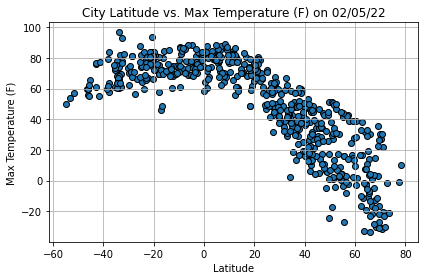

In [6]:
# Configure scatter plot
plt.scatter(
    weather_df["latitude"], 
    weather_df["maxtemp_f"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F) on 02/05/22")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/lat_temp.png")
plt.show()

This code shows the relationship between a city's global latitude position
and its maximum temperature (F) recorded on the day the data was retrieved.

## Latitude vs. Humidity Plot

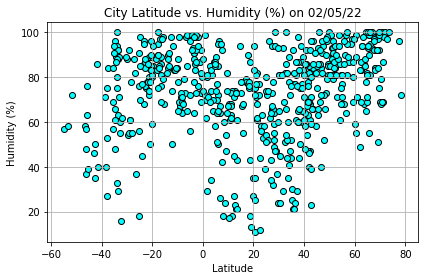

In [7]:
# Configure scatter plot
plt.scatter(
    weather_df["latitude"], 
    weather_df["humidity_percent"], 
    edgecolors="black",
    facecolor="cyan"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) on 02/05/22")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/lat_humid.png")
plt.show()

This code shows the relationship between a city's global latitude position and
its recorded humidity percentage on the day the data was retrieved.

## Latitude vs. Cloudiness Plot

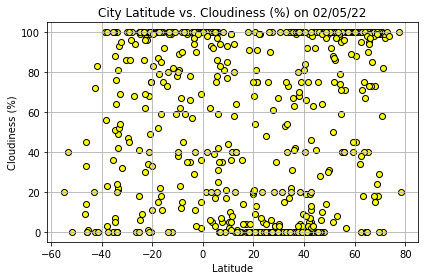

In [8]:
# Configure scatter plot
plt.scatter(
    weather_df["latitude"], 
    weather_df["cloudiness_percent"], 
    edgecolors="black",
    facecolor="yellow"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) on 02/05/22")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/lat_cloud.png")
plt.show()

This code shows the relationship between a city's global latitude position and
its recorded cloudiness percentage on the day the data was retrieved.

## Latitude vs. Wind Speed Plot

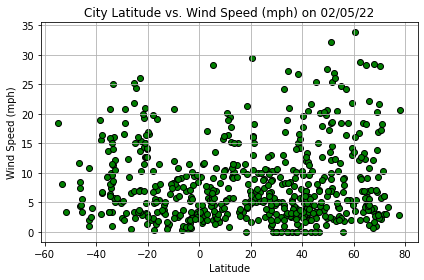

In [9]:
# Configure scatter plot
plt.scatter(
    weather_df["latitude"], 
    weather_df["windspeed_mph"], 
    edgecolors="black",
    facecolor="green"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph) on 02/05/22")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/lat_wind.png")
plt.show()

This code shows the relationship between a city's global latitude position and
its recorded wind speed in miles per hour on the day the data was retrieved.

## Linear Regression

In [10]:
# Separate DataFrame into northern and southern DataFrames
north_df = weather_df.loc[weather_df["latitude"] > 0]
south_df = weather_df.loc[weather_df["latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.869483417195524


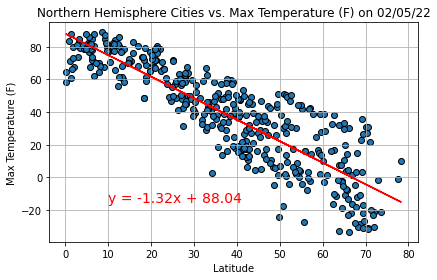

In [11]:
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope1, yint1, rval1, pval1, sterr1) = linregress(
    north_df["latitude"], north_df["maxtemp_f"]
)

# Find y-values of regression line 
regress_val1 = (north_df["latitude"] * slope1) + yint1

# Equation of regression line for annotation
line_eq1 = f"y = {round(slope1, 2)}x + {round(yint1, 2)}"

# Display r-value
print(f"The r-value is: {rval1}")

# Configure scatter plot
plt.scatter(
    north_df["latitude"], 
    north_df["maxtemp_f"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere Cities vs. Max Temperature (F) on 02/05/22")

# Plot regression line
plt.plot(north_df["latitude"], regress_val1, color="r")

# Annotate with regression line
plt.annotate(line_eq1, (10, -15), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/north_temp.png")
plt.show()

With an r-value of -0.87, we know that the data displayed between the two 
variables will be **strongly and negatively correlated**. This means that, as
latitude increases (moves northward), the maximum recorded temperature 
decreases. We see that the regression line follows this trend.

It is interesting to note that the maximum temperatures for northern cities 
range from as high as 80F to as low as -45F. With it being winter in the 
northern hemisphere, it would make sense that the closer a city is to the
equator, the warmer it is.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.42710795524691186


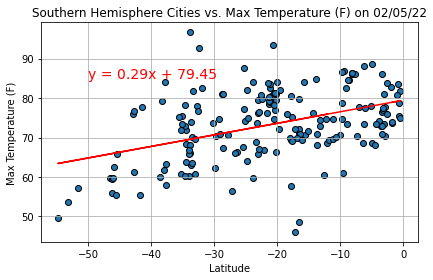

In [12]:
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope2, yint2, rval2, pval2, sterr2) = linregress(
    south_df["latitude"], south_df["maxtemp_f"]
)

# Find y-values of regression line 
regress_val2 = (south_df["latitude"] * slope2) + yint2

# Equation of regression line for annotation
line_eq2 = f"y = {round(slope2, 2)}x + {round(yint2, 2)}"

# Display r-value
print(f"The r-value is: {rval2}")

# Configure scatter plot
plt.scatter(
    south_df["latitude"], 
    south_df["maxtemp_f"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere Cities vs. Max Temperature (F) on 02/05/22")

# Plot regression line
plt.plot(south_df["latitude"], regress_val2, color="r")

# Annotate with regression line
plt.annotate(line_eq2, (-50, 85), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/south_temp.png")
plt.show()

With an r-value of 0.43, we see a **weak positive correlation** between 
cities in the southern hemisphere and their max temperatures. This means that as
the latitude increases (moves northward), the maximum temperature also 
increases.

With cities in the southern hemisphere, it is interesting to see that the range
of temperatures are not as high, with the lowest being somewhere around 45F and 
the highest about 95F. With it being summer in the southern hemisphere right
now, we would expect to see warmer temperatures generally.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.40854223682525326


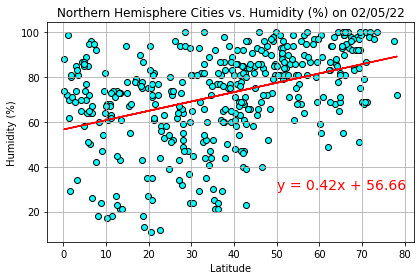

In [13]:
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope3, yint3, rval3, pval3, sterr3) = linregress(
    north_df["latitude"], north_df["humidity_percent"]
)

# Find y-values of regression line 
regress_val3 = (north_df["latitude"] * slope3) + yint3

# Equation of regression line for annotation
line_eq3 = f"y = {round(slope3, 2)}x + {round(yint3, 2)}"

# Display r-value
print(f"The r-value is: {rval3}")

# Configure scatter plot
plt.scatter(
    north_df["latitude"], 
    north_df["humidity_percent"], 
    edgecolors="black",
    facecolor="cyan"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Cities vs. Humidity (%) on 02/05/22")

# Plot regression line
plt.plot(north_df["latitude"], regress_val3, color="r")

# Annotate with regression line
plt.annotate(line_eq3, (50, 30), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/north_humid.png")
plt.show()

With an r-value of 0.41, we see a **weak, positive correlation** between cities
in the northern hemisphere and their humidity.

What is interesting about this plot in particular is that cities below 40 
degrees latitude seem to be extremely loose, but cities that lie above 40
degrees latitude seem to be more closely related to their humidity. My initial 
assumption is that it has to do with it being winter, though I would not be able
to know for sure unless I test for it. The more northern a city, the more likely
it is that it will be snowing/precipitating, and therefore have higher humidity.
However, I would also have expected northern cities in the winter to be colder,
and therefore more drier, so seeing these results is very unexpected.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.42708354364361584


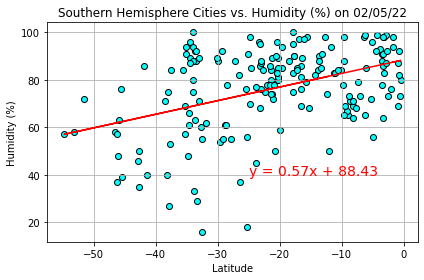

In [14]:
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope4, yint4, rval4, pval4, sterr4) = linregress(
    south_df["latitude"], south_df["humidity_percent"]
)

# Find y-values of regression line 
regress_val4 = (south_df["latitude"] * slope4) + yint4

# Equation of regression line for annotation
line_eq4 = f"y = {round(slope4, 2)}x + {round(yint4, 2)}"

# Display r-value
print(f"The r-value is: {rval4}")

# Configure scatter plot
plt.scatter(
    south_df["latitude"], 
    south_df["humidity_percent"], 
    edgecolors="black",
    facecolor="cyan"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Cities vs. Humidity (%) on 02/05/22")

# Plot regression line
plt.plot(south_df["latitude"], regress_val4, color="r")

# Annotate with regression line
plt.annotate(line_eq4, (-25, 40), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/south_humid.png")
plt.show()

With an r-value of 0.43, we see a **weak, positive correlation** between 
southern cities and humidity. 

There is a cluster of cities below -25 degrees latitude where the humidity drops
between 20F to 50F. Although the relationship is weak, my initial guess as to
why there might be a correlation between southern city latitude and the lower
humidity is because of drier weather due to the southern hemisphere's summer
season. Whether the season itself is causing this is a question that should be
experimentally tested.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2837053711272211


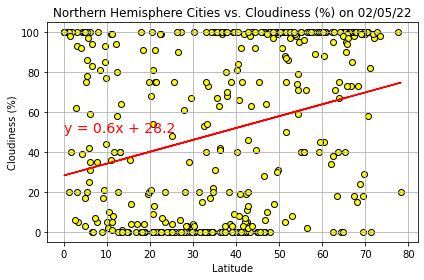

In [15]:
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope5, yint5, rval5, pval5, sterr5) = linregress(
    north_df["latitude"], north_df["cloudiness_percent"]
)

# Find y-values of regression line 
regress_val5 = (north_df["latitude"] * slope5) + yint5

# Equation of regression line for annotation
line_eq5 = f"y = {round(slope5, 2)}x + {round(yint5, 2)}"

# Display r-value
print(f"The r-value is: {rval5}")

# Configure scatter plot
plt.scatter(
    north_df["latitude"], 
    north_df["cloudiness_percent"], 
    edgecolors="black",
    facecolor="yellow"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cities vs. Cloudiness (%) on 02/05/22")

# Plot regression line
plt.plot(north_df["latitude"], regress_val5, color="r")

# Annotate with regression line
plt.annotate(line_eq5, (0, 50), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/north_cloud.png")
plt.show()

With an r-value of 0.28, we see a **very weak, positive correlation** between 
northern cities and their cloudiness percentage. 

However, the only reason why there may be any correlation at all with regards
to this dataset is because of how the points are clustered on the plot. There 
are two large clusters, where about half of the points seem to lie around 80 to 
100% cloudiness and the other half lying somewhere around 0 to 40%. It seems
that the closer to the equator a city is, the less cloudy it is, and vice versa.
However, the data is so clustered around those two areas that it becomes really
difficult to determine if the latitude itself has anything to do with the 
cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.32168456538756013


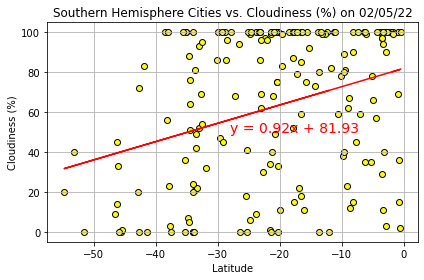

In [16]:
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope6, yint6, rval6, pval6, sterr6) = linregress(
    south_df["latitude"], south_df["cloudiness_percent"]
)

# Find y-values of regression line 
regress_val6 = (south_df["latitude"] * slope6) + yint6

# Equation of regression line for annotation
line_eq6 = f"y = {round(slope6, 2)}x + {round(yint6, 2)}"

# Display r-value
print(f"The r-value is: {rval6}")

# Configure scatter plot
plt.scatter(
    south_df["latitude"], 
    south_df["cloudiness_percent"], 
    edgecolors="black",
    facecolor="yellow"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Cities vs. Cloudiness (%) on 02/05/22")

# Plot regression line
plt.plot(south_df["latitude"], regress_val6, color="r")

# Annotate with regression line
plt.annotate(line_eq6, (-28, 50), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/south_cloud.png")
plt.show()

With an r-value of 0.32, there is a **weak positive correlation** between 
southern cities and their cloudiness percentage.

Similar to the northern cities, there seems to be an enormous cluster of cities
with around 100% cloudiness, and their latitudes range from -40 to 0 degrees.
Because of that large range, I am more inclined to think that there is very
little correlation between a city's latitude and their cloudiness. I suspect
that this apparent positive relationship has more to do with the fact that the
cluster is skewing the regression line towards it. Thinking about it further,
cloud formation is more dependent on transitory physical causes that can occur
anywhere on earth, so I would expect very little correlation here with latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12960032942694044


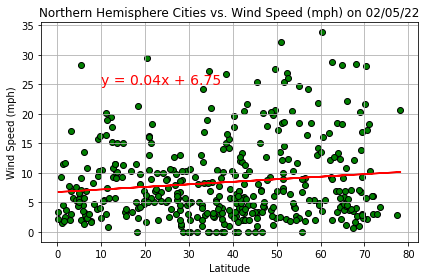

In [17]:
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope7, yint7, rval7, pval7, sterr7) = linregress(
    north_df["latitude"], north_df["windspeed_mph"]
)

# Find y-values of regression line 
regress_val7 = (north_df["latitude"] * slope7) + yint7

# Equation of regression line for annotation
line_eq7 = f"y = {round(slope7, 2)}x + {round(yint7, 2)}"

# Display r-value
print(f"The r-value is: {rval7}")

# Configure scatter plot
plt.scatter(
    north_df["latitude"], 
    north_df["windspeed_mph"], 
    edgecolors="black",
    facecolor="green"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Cities vs. Wind Speed (mph) on 02/05/22")

# Plot regression line
plt.plot(north_df["latitude"], regress_val7, color="r")

# Annotate with regression line
plt.annotate(line_eq7, (10, 25), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/north_wind.png")
plt.show()

With an r-value of 0.13, there is **little to no correlation** between northern 
cities and their wind speed.

There is just simply no trend in the data to be able to reasonably conclude that
a city's latitude is related to the wind speed a city experiences. With wind
being a phenomenon that occurs due to physical changes in the atmosphere, 
it would be very unlikely for a city's location to have any affect on the wind
speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24121170956945953


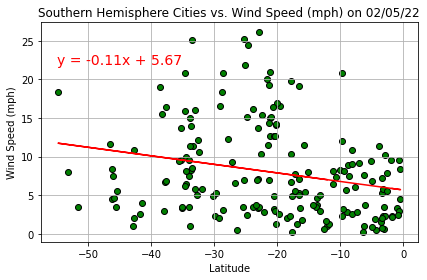

In [18]:
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope8, yint8, rval8, pval8, sterr8) = linregress(
    south_df["latitude"], south_df["windspeed_mph"]
)

# Find y-values of regression line 
regress_val8 = (south_df["latitude"] * slope8) + yint8

# Equation of regression line for annotation
line_eq8 = f"y = {round(slope8, 2)}x + {round(yint8, 2)}"

# Display r-value
print(f"The r-value is: {rval8}")

# Configure scatter plot
plt.scatter(
    south_df["latitude"], 
    south_df["windspeed_mph"], 
    edgecolors="black",
    facecolor="green"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Cities vs. Wind Speed (mph) on 02/05/22")

# Plot regression line
plt.plot(south_df["latitude"], regress_val8, color="r")

# Annotate with regression line
plt.annotate(line_eq8, (-55, 22), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output/south_wind.png")
plt.show()

With an r-value of -0.24, there is **little to no correlation** between southern 
cities and their wind speed.

Although it may look like there is a negative trend just from eyeballing the 
regression line, it is important to look at the r-value for confirmation. 
Additionally, it may be entirely possible that the set of values we got by from 
querying the API resulted in a somewhat negatively directional relationship 
simply from chance. This would require us to look at different correlation 
coefficients and to check for statistically significant values.